<a href="https://colab.research.google.com/github/Tiwari666/12_Months_Data_Compilation/blob/main/12_Months_Data_Compilation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
#Python has a built-in os module with methods for interacting with the operating system, like creating files and directories,
#management of files and directories, input, output, environment variables, process management, etc.

# Merge data from each month into one CSV file


In [2]:
# Load the CSV file
df = pd.read_csv("/content/Sale_November_2019.csv")

# List all files in the directory
directory_path = "/content/"
files = [file for file in os.listdir(directory_path)]

# Print all files
for file in files:
    print(file)

.config
Sales_December_2019.csv
Sale_November_2019.csv
Sales_September_2019.csv
Sales_August_2019.csv
Sales_March_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_May_2019.csv
Sales_October_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
sample_data


# Task1: Compiling all 12-month data in a single CSV file

In [3]:
# Directory path where the CSV files are located
directory_path = "/content/"

# Initialize an empty DataFrame to store all data
all_months_data = pd.DataFrame()

# List all files in the directory
files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Iterate over each file and concatenate it to the all_months_data DataFrame
for file in files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    all_months_data = pd.concat([all_months_data, df], ignore_index=True)

# Save the combined DataFrame to a new CSV file
all_months_data.to_csv("/content/all_data.csv", index=False)

#  Read in updated dataframe

In [4]:
all_months_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
186846,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
186847,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
186848,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"
186849,150501,Google Phone,1,600,01/13/19 16:43,"428 Cedar St, Boston, MA 02215"


In [5]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


# 1) What was the best month for sale? How much was earned on that month?
This question asks for the month. But there is no "month" column only. So, let's separate the "month" form the "Order Date" column first.

In [6]:
# Get a summary of the DataFrame
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# Looks like there is "Or" in the first two number of the month under the column "Order Date".

Find "Or" and delet it: Get rid of text in order date column

Filter out rows from all_months_data where the 'Order Date' column starts with the string 'Or'.

In [ ]:
temp_df = all_months_data[all_months_data['Order Date'].str[0:2]=='Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
243,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1412,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1427,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
931906,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
933034,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
933578,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
933849,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


# Task2: Adding the month column:


In [7]:
# Directory path where the CSV files are located
directory_path = "/content/"

# Initialize an empty DataFrame to store all data
all_months_data = pd.DataFrame()

# List all files in the directory and filter for CSV files
files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Iterate over each file and concatenate it to the all_months_data DataFrame
for file in files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    all_months_data = pd.concat([all_months_data, df], ignore_index=True)

# Display the first few rows of the combined DataFrame to understand its structure
print("Sample data before cleaning:")
all_months_data.head()

Sample data before cleaning:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [8]:
nan_values = all_months_data.isna().sum()
nan_values

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

# **Convert 'Order Date' to Datetime:**

In [9]:
# errors='coerce': This parameter in pd.to_datetime() ensures that any values that cannot be parsed as datetime will be set as NaT (Not a Time).
# This helps handle unexpected values like headers or placeholders.

all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

# **Extract 'Month' and Create the Column:**

In [10]:
all_months_data['Month'] = all_months_data['Order Date'].dt.month
# Display the updated DataFrame with 'Month' column
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0


# **TASK3: Add a Sales Column**

In [11]:
# Make sure 'Quantity Ordered' and 'Price Each' columns are numeric (if not, convert them)
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'], errors='coerce')
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'], errors='coerce')

# Calculate 'Sales' column
all_months_data['Sales'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']

# Display the updated DataFrame with 'Sales' column
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95


# **There are two ways to convert the datatypes**

1)astype() function :


2) pd.to_numeric function


In [12]:
# Calculate total sales per month
monthly_sales = all_months_data.groupby('Month')['Sales'].sum()
monthly_sales

Month
1.0     3644513.46
2.0     4404044.84
3.0     5614200.76
4.0     6781340.48
5.0     6305213.50
6.0     5155604.52
7.0     5295551.52
8.0     4488935.76
9.0     4195120.26
10.0    7473453.76
11.0    6399206.40
12.0    9226886.68
Name: Sales, dtype: float64

In [13]:
# Identify the month with the highest sales
best_month = monthly_sales.idxmax()
best_month_sales = monthly_sales.max()
print(f"The best month for sales was month {best_month} with total sales of ${best_month_sales:.2f}.")

The best month for sales was month 12.0 with total sales of $9226886.68.


# We can answer the question1 using the VISUALIATION as well.

In [14]:
# Plot total sales per month
months = range(1, 13)
sales = [monthly_sales.get(month, 0) for month in months]  # Handle missing months

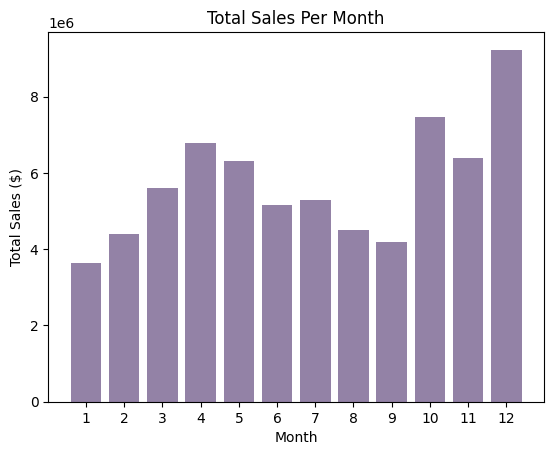

In [16]:
import matplotlib.pyplot as plt
plt.bar(months, sales, color = (0.4,0.3,0.5,0.7)) # Create bars and choose color
plt.xlabel('Month') # Create names on the x axis
plt.ylabel('Total Sales ($)')  # ADD names on the y axis
plt.title('Total Sales Per Month') # Add title
plt.xticks(months)  #ADD names on X axis
plt.show()  ## Show graph


# Ticks are the markers denoting data points on axes.
#The xticks() and yticks() function takes a list object as argument.

# ** Q2: What US city has the highest number of sale?**
Note that the city is NOT given separetely in the data.
So, we need to augment the data to separate/make the city as a new column from the column "Purchase Address"

# ADDING THE CITY COLUMN IN A RIGHT WAY

Since the same  city name can be found under different states, let's extract the name of the city with their respective states.

In [18]:
def get_city(address):
    if isinstance(address, str):
        parts = address.split(",")
        return parts[1].strip() if len(parts) > 1 else ''
    return ''

def get_state(address):
    if isinstance(address, str):
        parts = address.split(",")
        state_zip = parts[2].split(' ') if len(parts) > 2 else []
        return state_zip[1] if len(state_zip) > 1 else ''
    return ''

# Apply the functions to extract city and state
all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

# Display the first few rows to check the results
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City NY
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City NY
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City NY
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta GA


# ANSWERING THE QUESTION (2): Aggregating sales across different cities

In [19]:
result2 = all_months_data.groupby(['City']).sum(numeric_only=True)
result2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
,0.0,0.00,0.0,0.00
Atlanta GA,33204.0,5559816.40,209588.0,5590997.16
Austin TX,22306.0,3619747.22,139658.0,3639163.50
Boston MA,45056.0,7274819.54,282224.0,7323284.02
Dallas TX,33460.0,5505255.64,209240.0,5535950.80
Los Angeles CA,66578.0,10842870.46,416650.0,10905141.60
New York City NY,55864.0,9270741.66,351482.0,9328634.86
Portland ME,5500.0,894378.50,34288.0,899516.54
Portland OR,22606.0,3721116.44,141242.0,3741464.68


In [20]:
# Assuming result2 is already calculated
result2 = all_months_data.groupby(['City']).sum(numeric_only=True)

# Find the city with the maximum sales
max_sales_city = result2['Sales'].idxmax()
max_sales_value = result2['Sales'].max()

print(f"The city with the maximum sales is {max_sales_city} with sales of ${max_sales_value:.2f}.")

The city with the maximum sales is San Francisco CA with sales of $16524407.82.


# **Visulization:**

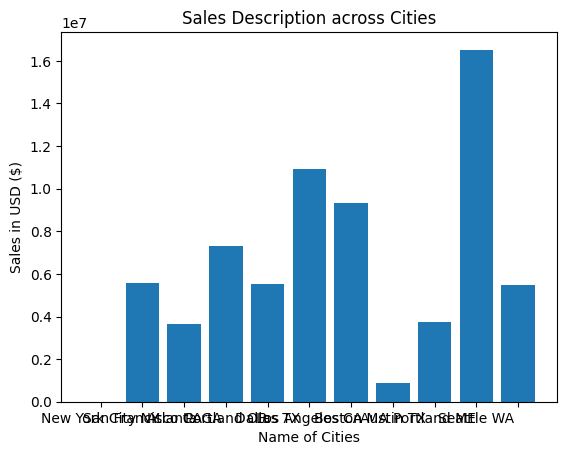

In [21]:
import matplotlib.pyplot as plt
Cities = all_months_data['City'].unique()

plt.bar(Cities,result2['Sales'])
plt.title('Sales Description across Cities') # Add title and axis names
plt.xticks(Cities) # Create names on the x-axis
plt.ylabel('Sales in USD ($)') #  ADD names on the y-axis
plt.xlabel('Name of Cities')  # ADD names on X axis                   # we can also use the date time library.
plt.show()


#Look at the X-axis! The name of the month is not readable.
#So, we need to adjuct the "xtick" vertically.
# with "rotation = vertical" followed by adjusting the font size.

In [22]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City NY
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City NY
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City NY
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta GA


# **Fixing the overlapping names' problem along the X-axis**

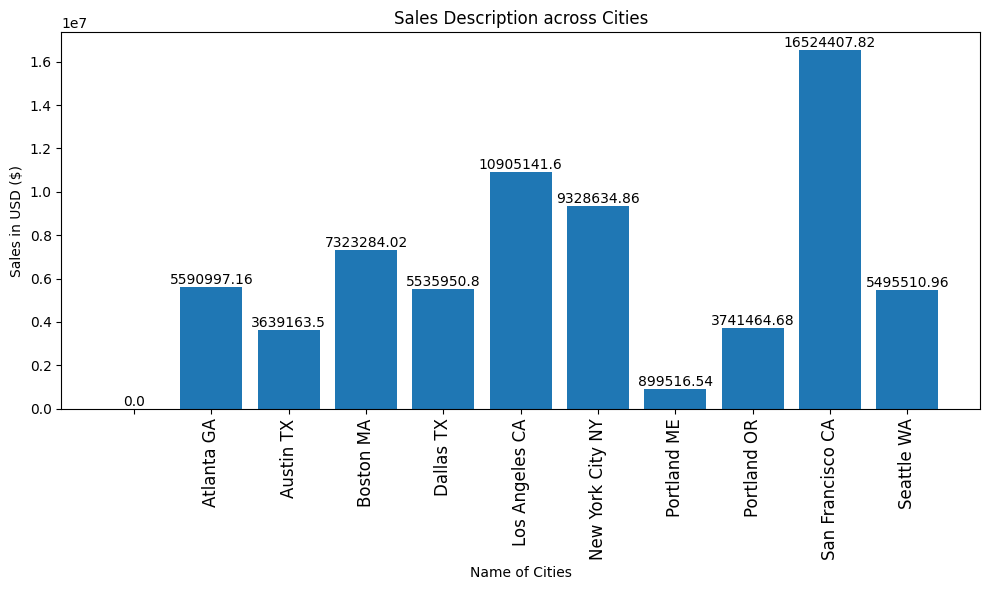

In [23]:
# Convert 'Sales' column to numeric, coercing errors to NaN
all_months_data['Sales'] = pd.to_numeric(all_months_data['Sales'], errors='coerce')

# Group by 'City' and compute sum of 'Sales', handling NaN values
sales_per_city = all_months_data.groupby('City')['Sales'].sum()

# Generate keys for the x-axis
keys = sales_per_city.index

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(keys, sales_per_city)
plt.title('Sales Description across Cities')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Name of Cities')
plt.xticks(keys, rotation='vertical', size=12)

# Adding labels on top of the bars
for bar, sales in zip(bars, sales_per_city):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(sales, 2), va='bottom', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# ** Q3: What time should we display advertisement to maximize the likelihood's of customers' buying product?**

In [24]:
all_months_data.head()

# For this purpose, w need to convert the column --Order Date-- into the day-time object.
# It is because the date-time library in the Python really allows us to access different parts of the day.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City NY
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City NY
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City NY
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta GA


In [28]:
# converting the "Order Date" column to a datetime format
all_months_data["Order Date"] = pd.to_datetime(all_months_data["Order Date"])

In [29]:
all_months_data.head()
#

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City NY
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City NY
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City NY
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta GA


# Now, let's add  the hour column into our "data"

In [30]:
all_months_data['Hour'] = all_months_data["Order Date"].dt.hour
all_months_data.head()
#dt- gives access to date.
#hour -gives access to the hour
# One can see that another column called "Hour" is added into our dataset.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City NY,0.0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City NY,7.0
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City NY,18.0
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco CA,15.0
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta GA,12.0


In [31]:
# all_months_data['Hour'] = all_months_data["Order Date"].dt.hour
all_months_data['Minute'] = all_months_data["Order Date"].dt.minute
all_months_data['Count'] = 1
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City NY,0.0,1.0,1
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City NY,7.0,3.0,1
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City NY,18.0,21.0,1
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco CA,15.0,13.0,1
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta GA,12.0,38.0,1


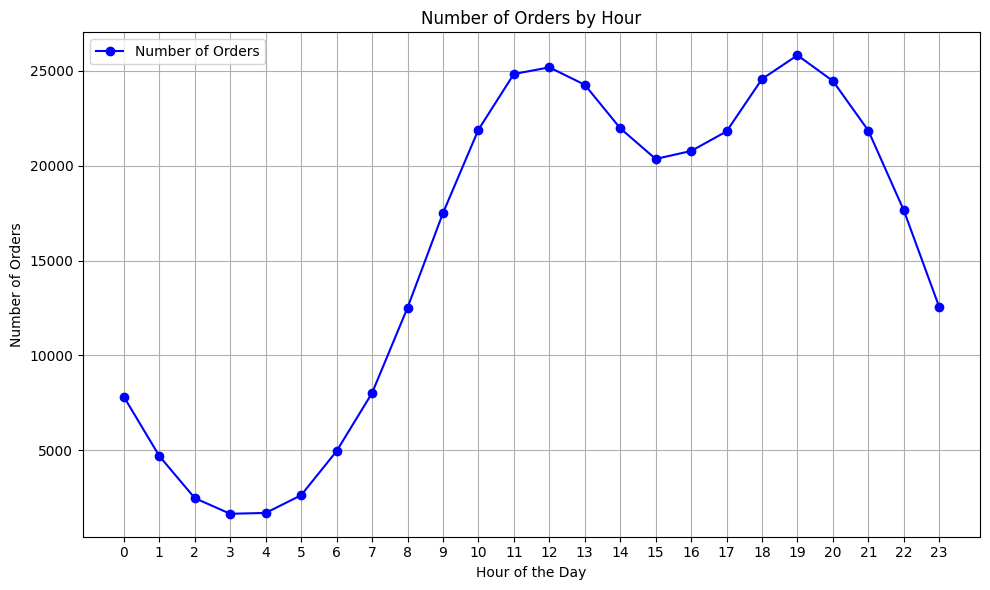

In [32]:
# Group by 'Hour' and count number of orders
hourly_counts = all_months_data.groupby('Hour').count()['Count']

# Extract hours and counts
hours = hourly_counts.index
counts = hourly_counts.values

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(hours, counts, marker='o', linestyle='-', color='b', label='Number of Orders')
plt.title('Number of Orders by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(hours)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#Note: As time (hour) is a continuous variable, we need to use the line chart, not the bar graph.
# One can see the number of order by each consumer in each and every hour.

In [33]:
all_months_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City NY,0.0,1.0,1
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City NY,7.0,3.0,1
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City NY,18.0,21.0,1
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco CA,15.0,13.0,1
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta GA,12.0,38.0,1
5,295670,AA Batteries (4-pack),1.0,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12.0,3.84,New York City NY,22.0,58.0,1
6,295671,USB-C Charging Cable,1.0,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12.0,11.95,Portland OR,15.0,10.0,1
7,295672,USB-C Charging Cable,2.0,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12.0,23.90,Dallas TX,9.0,29.0,1
8,295673,Bose SoundSport Headphones,1.0,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12.0,99.99,Dallas TX,23.0,26.0,1
9,295674,AAA Batteries (4-pack),4.0,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12.0,11.96,Dallas TX,11.0,51.0,1


# 4) What products are most often sold together?

How to introduce the questions: How do I know that products are sold together?

Ans: Looking at the order ID.

 If the order ID is the same, this shows that customers have ordered those goods at the same time.

For example, google phone and wired headphone are ordered together because they have the same order ID(176560).

SO, COUNTING ALL THE DUPLICATE IDs SHOW THAT WHICH PRODUCTS ARE SOLD TOGETHER...

In [36]:
# The parameter keep=False ensures that all instances of duplicate 'Order ID' values are marked as True.

#If one used keep='first' or keep='last', only the first or last occurrence would be marked as False (not duplicated).

df = all_months_data[all_months_data['Order ID'].duplicated(keep=False)]

# group the products for each 'Order ID'

# The transform method is used in this context to ensure that the new 'Grouped' column maintains the same index as the original DataFrame.

# transform(lambda x: ','.join(x)): Applies a lambda function to each group that concatenates the 'Product' names into a single string, separated by commas.
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Grouped
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City NY,0.0,1.0,1,"Macbook Pro Laptop,Macbook Pro Laptop"
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City NY,7.0,3.0,1,"LG Washing Machine,LG Washing Machine"
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City NY,18.0,21.0,1,"USB-C Charging Cable,USB-C Charging Cable"
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco CA,15.0,13.0,1,"27in FHD Monitor,27in FHD Monitor"
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta GA,12.0,38.0,1,"USB-C Charging Cable,USB-C Charging Cable"


In [37]:
#Dropping the Duplicate IDs;

# After concatenating the product names for each 'Order ID', we will have multiple rows for the same 'Order ID', each with the same 'Grouped' value.

#Dropping duplicates ensures that each 'Order ID' appears only once in the final DataFrame, simplifying the analysis of which product combinations are most frequent.

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(10)

,Order ID,Grouped
0,295665,"Macbook Pro Laptop,Macbook Pro Laptop"
1,295666,"LG Washing Machine,LG Washing Machine"
2,295667,"USB-C Charging Cable,USB-C Charging Cable"
3,295668,"27in FHD Monitor,27in FHD Monitor"
4,295669,"USB-C Charging Cable,USB-C Charging Cable"
5,295670,"AA Batteries (4-pack),AA Batteries (4-pack)"
6,295671,"USB-C Charging Cable,USB-C Charging Cable"
7,295672,"USB-C Charging Cable,USB-C Charging Cable"
8,295673,"Bose SoundSport Headphones,Bose SoundSport Hea..."
9,295674,"AAA Batteries (4-pack),AAA Batteries (4-pack)"


# **COUNTING THE PAIR OF PRODUCTS WHICH OCCUR TOGETHER FREQUENTLY--**


In [38]:
from itertools import combinations
from collections import Counter

In [41]:
# Ensure 'Grouped' column contains only strings
df = df[df['Grouped'].apply(lambda x: isinstance(x, str))]

# Initialize a Counter to count pairs of products
count = Counter()

# Iterate through each row in the 'Grouped' column
for products in df['Grouped']:
    # Split the products by comma to get individual products
    product_list = products.split(',')
    # Generate all possible pairs of products in the order
    count.update(Counter(combinations(product_list, 2)))

# Display the most common pairs of products
count.most_common(10)

[(('Product', 'Product'), 251695),
 (('USB-C Charging Cable', 'USB-C Charging Cable'), 22095),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 21874),
 (('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)'), 20833),
 (('AA Batteries (4-pack)', 'AA Batteries (4-pack)'), 20717),
 (('Wired Headphones', 'Wired Headphones'), 19022),
 (('Apple Airpods Headphones', 'Apple Airpods Headphones'), 15645),
 (('Bose SoundSport Headphones', 'Bose SoundSport Headphones'), 13433),
 (('27in FHD Monitor', '27in FHD Monitor'), 7543),
 (('iPhone', 'iPhone'), 6850)]

In [43]:
# To get results in more readable format, use the following code:
for key,value in count.most_common(10):
    print(key, value)

('Product', 'Product') 251695
('USB-C Charging Cable', 'USB-C Charging Cable') 22095
('Lightning Charging Cable', 'Lightning Charging Cable') 21874
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 20833
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 20717
('Wired Headphones', 'Wired Headphones') 19022
('Apple Airpods Headphones', 'Apple Airpods Headphones') 15645
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 13433
('27in FHD Monitor', '27in FHD Monitor') 7543
('iPhone', 'iPhone') 6850


# **Conclusion:**

After analyzing the dataset to identify the most frequently sold pairs of products, we found the following insights:

Frequently Sold Product Pairs: The analysis revealed that certain products are often purchased together by consumers. For instance, pairs like ('iPhone', 'Lightning Charging Cable') and other common combinations emerged as top pairs.
Recommendations:
Promotional Bundles:

Bundle Deals: Create promotional bundles for the most frequently purchased pairs, such as ('iPhone', 'Lightning Charging Cable'). Offering these as a package deal can attract more customers and increase sales.
Discounts on Bundles: Provide discounts on these bundles to incentivize customers to buy the products together rather than separately. This can also help in increasing the average order value.
Cross-Selling Strategies:

Suggested Products: When a customer adds an iPhone to their cart, suggest the Lightning Charging Cable as an add-on item. Use data-driven insights to recommend other frequently purchased pairs.
Personalized Recommendations: Use the insights from commonly sold product pairs to create personalized marketing campaigns. Send targeted emails or notifications suggesting complementary products based on the customer’s purchase history.
In-Store Promotions:

Physical Store Bundles: For physical retail locations, place commonly purchased items together. For example, place iPhones and Lightning Charging Cables in close proximity with signage indicating a bundle discount.
Point-of-Sale Promotions: Train sales staff to suggest complementary products at the point of sale. Equip them with information about the most frequently purchased pairs to make informed suggestions to customers.
Online Store Enhancements:

Product Pairing on Website: Highlight commonly bought together items on the product pages of your e-commerce website. Display these pairs prominently with an option to add both to the cart at once.
Bundle Checkout Options: Offer customers the option to purchase product bundles at a discount during the checkout process. This can be a last-minute nudge to increase the total purchase value.
Customer Feedback and Adaptation:

Collect Feedback: Regularly collect customer feedback on bundled products and adjust offerings based on customer preferences and trends.
Adapt to Trends: Keep track of emerging trends in product purchases and adapt your bundle offerings accordingly to stay relevant and appealing to your customers.
By leveraging the insights gained from analyzing product pairs, implementing these strategies can drive higher sales, improve customer satisfaction, and create a more efficient and profitable sales strategy.



# **5) What product sold the most? Why do you think it sold the most?**

# Calculate Total Quantity Sold for Each Product:

# Sum the Quantity Ordered for each product to find out which product had the highest total sales volume.

In [47]:
# Group by 'Product'
product_group = all_months_data.groupby('Product')

# Sum only numeric columns
product_sales = product_group.sum(numeric_only=True).reset_index()

# Find the product with the maximum quantity sold
most_sold_product = product_sales.loc[product_sales['Quantity Ordered'].idxmax()]

print(most_sold_product)

Product             AAA Batteries (4-pack)
Quantity Ordered                   62034.0
Price Each                       123433.18
Month                             292740.0
Sales                            185481.66
Hour                              594664.0
Minute                           1224226.0
Count                                41282
Name: 5, dtype: object


In [49]:
# Group by 'Product' and sum the relevant numeric columns
product_group = all_months_data.groupby('Product').sum(numeric_only=True)

# Reset the index to get 'Product' as a column
product_group.reset_index(inplace=True)

# Print the result in the desired format
product_group

,Product,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
0,20in Monitor,8258.0,902137.98,58672.0,908297.42,117528.0,244504.0,8202
1,27in 4K Gaming Monitor,12488.0,4859275.40,88880.0,4870195.12,181832.0,368662.0,12460
2,27in FHD Monitor,15100.0,2251949.86,105116.0,2264849.00,215080.0,439896.0,15014
3,34in Ultrawide Monitor,12398.0,4697436.38,86608.0,4711116.02,178152.0,366960.0,12362
4,AA Batteries (4-pack),55270.0,158031.36,291116.0,212236.80,596684.0,1218078.0,41154
5,AAA Batteries (4-pack),62034.0,123433.18,292740.0,185481.66,594664.0,1224226.0,41282
6,Apple Airpods Headphones,31322.0,4664700.00,218954.0,4698300.00,446608.0,911140.0,31098
7,Bose SoundSport Headphones,26914.0,2664733.50,188226.0,2691130.86,384890.0,785206.0,26650
8,Flatscreen TV,9638.0,2880000.00,68448.0,2891400.00,137630.0,285578.0,9600
9,Google Phone,11064.0,6630000.00,76610.0,6638400.00,158958.0,325546.0,11050


# **Reasons for High Sales:**

High Demand for Essential Items:

Everyday Necessity: Batteries are a common household item needed for various electronic devices. This continuous demand ensures consistent sales.
Broad Usage: AAA batteries are used in a wide range of devices, from remote controls to toys, making them a frequent purchase for many consumers.
Frequent Replacement:

Disposable Nature: Unlike rechargeable batteries, disposable batteries need to be replaced frequently, leading to repeated purchases.
Low Cost: Batteries are relatively inexpensive, making it easy for consumers to purchase them in bulk or frequently without a significant financial burden.
Marketing and Promotions:

Promotional Deals: There might have been effective promotions, discounts, or bundle deals that encouraged customers to buy more batteries.
Visibility: Batteries are often placed in prominent locations in stores and online, making them easily accessible and top-of-mind for consumers.
High Utility:

Versatility: The utility of batteries across various devices ensures that almost every household needs them, driving consistent demand.
Emergency Stocking: Consumers tend to stock up on batteries for emergencies or unforeseen needs, contributing to higher sales.
Recommendations:
Maintain Stock Levels: Ensure that the most sold products are always in stock to meet continuous demand.
Targeted Promotions: Continue to offer targeted promotions and bundle deals to maintain high sales volumes.
Expand Product Line: Consider expanding the product line to include related items (e.g., other types of batteries or energy products) to capitalize on the high demand.
Customer Engagement: Use customer purchase data to engage with customers through personalized offers and reminders to restock essential items like batteries.
By understanding why certain products sell more, businesses can make informed decisions on inventory management, marketing strategies, and customer engagement to further boost sales and customer satisfaction.

# **Graph to depict the result**

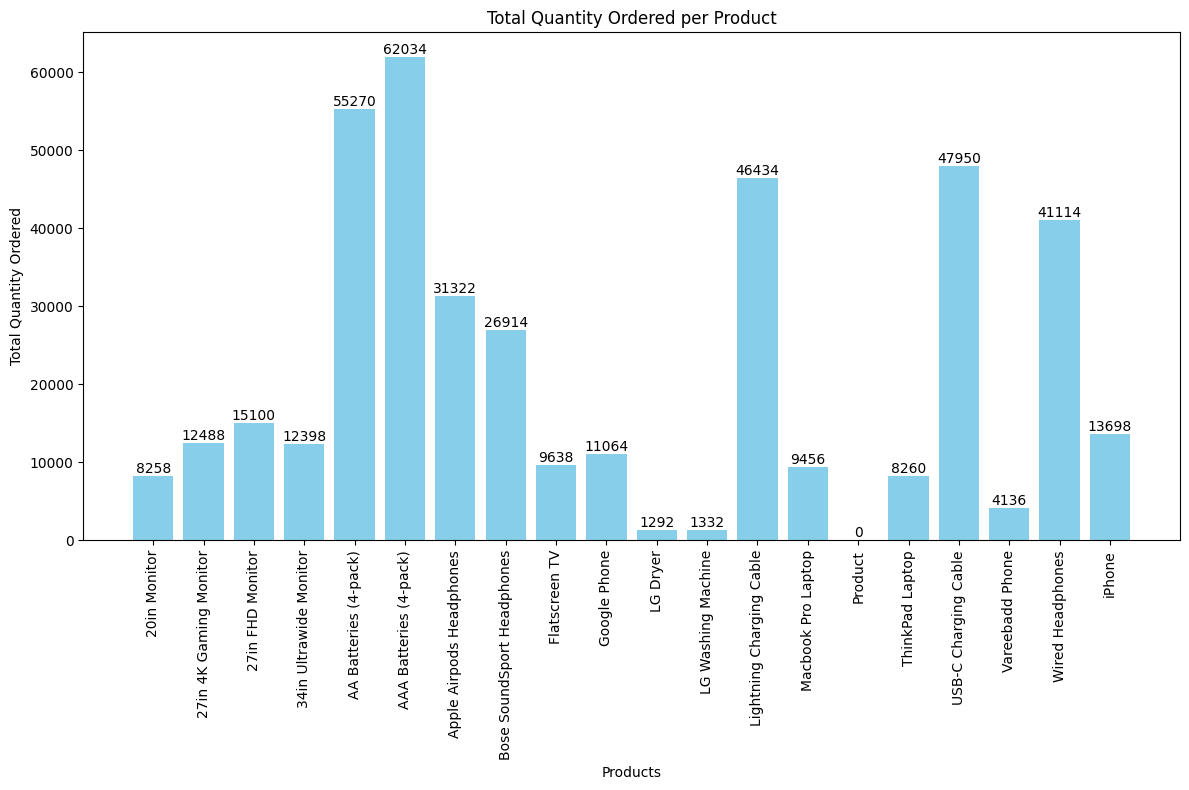

In [53]:
# Plot the results
plt.figure(figsize=(12, 8))
bars = plt.bar(product_group['Product'], product_group['Quantity Ordered'], color='skyblue')
plt.xlabel('Products')
plt.ylabel('Total Quantity Ordered')
plt.title('Total Quantity Ordered per Product')
plt.xticks(rotation=90)
plt.tight_layout()

# Add labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), ha='center', va='bottom')

plt.show()


# **Prices of those products**

To calculate and display the average price of each product, one can group the data by 'Product' and then calculate the mean for the 'Price Each' column.

In [54]:
# Calculate the average price of each product
prices = all_months_data.groupby('Product').mean(numeric_only=True)['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
Product                           NaN
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


# **Correlation Between Price and Quantity:**

To overlay the quantity ordered and the average price of each product on the same graph, with quantity ordered on the primary y-axis and price on the secondary y-axis, you can use matplotlib's twinx() function.

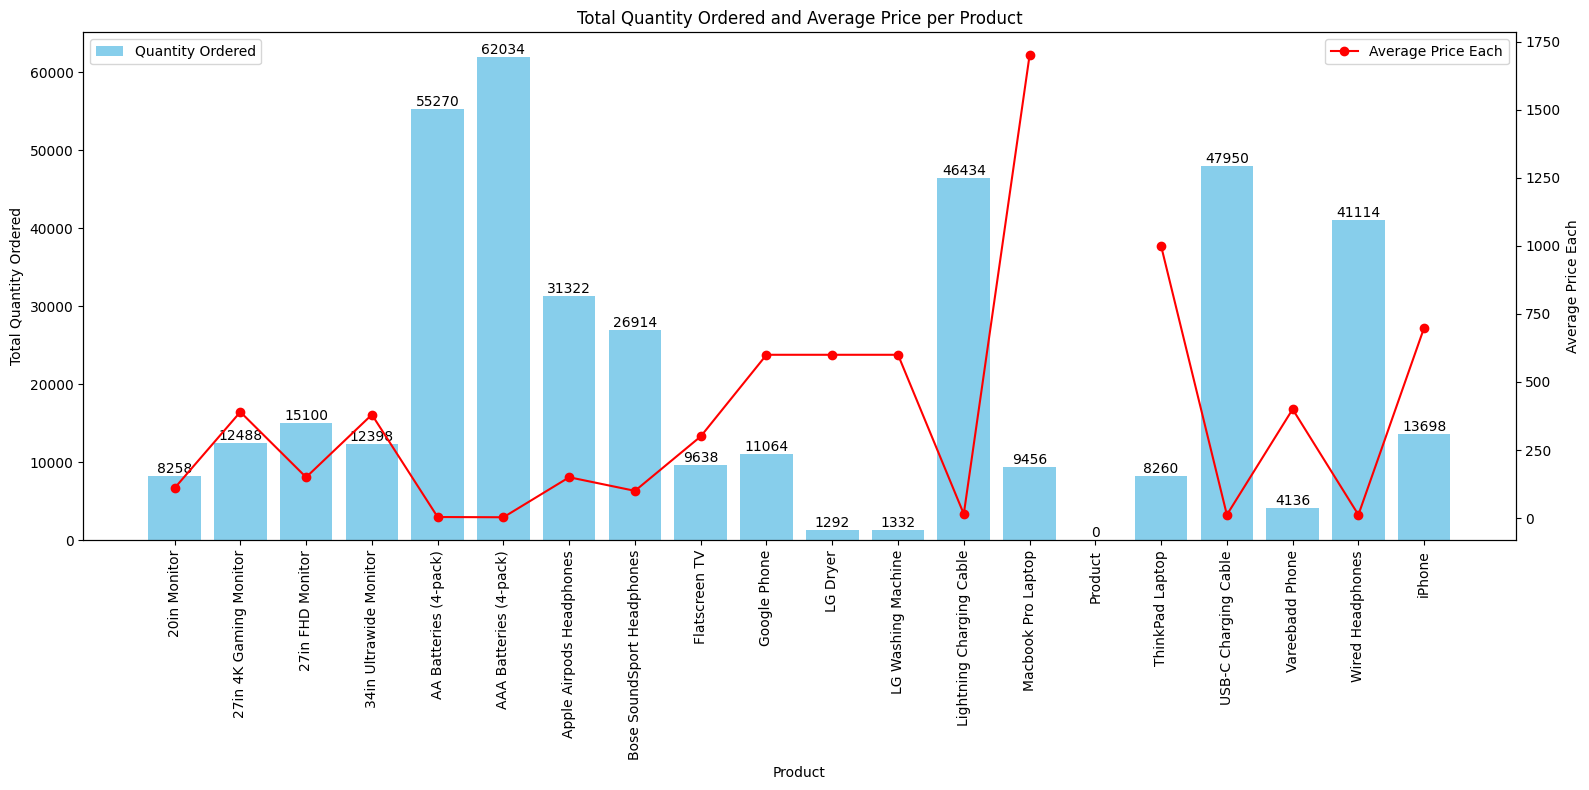

In [57]:
# Plot the results
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot Quantity Ordered on the primary y-axis
bars = ax1.bar(product_group['Product'], product_group['Quantity Ordered'], color='skyblue', label='Quantity Ordered')
ax1.set_xlabel('Product')
ax1.set_ylabel('Total Quantity Ordered')
ax1.set_title('Total Quantity Ordered and Average Price per Product')
ax1.set_xticks(range(len(product_group['Product'])))
ax1.set_xticklabels(product_group['Product'], rotation=90)
ax1.legend(loc='upper left')

# Add labels on each bar
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), ha='center', va='bottom')

# Create a secondary y-axis for the price
ax2 = ax1.twinx()
ax2.plot(product_group['Product'], prices, color='red', marker='o', label='Average Price Each')
ax2.set_ylabel('Average Price Each')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# **Conclusion:**

There seems to be an inverse relationship in some cases, where higher-priced items are ordered in smaller quantities and lower-priced items are ordered in higher quantities. This is typical consumer behavior where essential, low-cost items are bought in bulk, while high-cost items are bought less frequently.

# **Recommendations:**

Promotions on Essential Items:

Continue to offer bundle deals and promotions on high-volume, low-cost items like batteries to drive sales. These items have high turnover and can generate consistent revenue.

Cross-Sell Opportunities:

Leverage the high sales volumes of essential items to cross-sell related products. For example, when a customer buys AA or AAA batteries, suggest other electronics or gadgets that require batteries.

Targeted Marketing for High-Value Items:

High-value items like iPhones should be marketed with targeted campaigns. Emphasize their unique features, quality, and the value they offer to justify their higher prices.

Stock Management:

Ensure that inventory levels for high-demand items (both low-cost and high-cost) are managed efficiently to avoid stockouts or overstock situations. Use the sales data to predict future demand accurately.

Customer Segmentation:

Segment customers based on their purchasing behavior. For instance, frequent buyers of low-cost items might be more responsive to loyalty programs, while buyers of high-cost items might respond better to personalized service and premium offers.

Price Optimization:

Consider dynamic pricing strategies for products with moderate sales and prices. Adjusting prices based on demand, seasonality, and competitor pricing can optimize sales and profits.